In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("UNSW_NB15_training-set.csv")

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder()

In [5]:
df.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [6]:

df["proto"] = le.fit_transform(df["proto"])
df["service"] = le.fit_transform(df["service"])
df["state"] = le.fit_transform(df["state"])
df["attack_cat"] = le.fit_transform(df["attack_cat"])

In [7]:
df.dtypes


id                     int64
dur                  float64
proto                  int32
service                int32
state                  int32
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [8]:
imp_col = ['id',
 'proto',
 'service',
 'state',
 'rate',
 'sttl',
 'dload',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'ct_state_ttl',
 'attack_cat',
 'label']

In [10]:
df.attack_cat.unique()

array([6, 7, 1, 2, 3, 0, 4, 9, 8, 5])

In [11]:
dict = {6:"Normal", 7:"Reconnaissance",1:"Backdoor", 2:"Dos",3:"Exploits",0:"Analysis", 4:"Fuzzers", 9:"Worms", 8:"SHellcode", 5:"Generic"}

In [12]:
df = df[imp_col]

In [13]:
df.corr()

,id,proto,service,state,rate,sttl,dload,swin,stcpb,dtcpb,dwin,ct_state_ttl,attack_cat,label
id,1.000000,0.013538,-0.177332,-0.076545,-0.121700,0.095939,-0.106562,0.228434,0.143912,0.145089,0.185379,0.138739,0.274428,-0.387489
proto,0.013538,1.000000,0.139700,-0.126237,0.016812,0.068657,0.027953,0.092872,0.069114,0.068840,0.089179,-0.084815,0.199554,-0.003497
service,-0.177332,0.139700,1.000000,-0.115719,-0.085087,-0.265386,-0.116294,0.146489,0.134610,0.132844,0.173651,-0.177975,-0.105993,0.143634
state,-0.076545,-0.126237,-0.115719,1.000000,0.542535,0.607395,-0.170544,-0.542109,-0.493853,-0.494439,-0.638506,0.697962,-0.214254,0.459040
rate,-0.121700,0.016812,-0.085087,0.542535,1.000000,0.388155,-0.138441,-0.534075,-0.428528,-0.426959,-0.553097,0.399469,-0.126910,0.328629
sttl,0.095939,0.068657,-0.265386,0.607395,0.388155,1.000000,-0.386224,-0.370458,-0.305700,-0.304837,-0.398368,0.556059,-0.198748,0.504159
dload,-0.106562,0.027953,-0.116294,-0.170544,-0.138441,-0.386224,1.000000,0.222838,0.176405,0.182031,0.233261,-0.332431,0.175530,-0.280534
swin,0.228434,0.092872,0.146489,-0.542109,-0.534075,-0.370458,0.222838,1.000000,0.744099,0.741160,0.960125,-0.361567,0.169060,-0.414504
stcpb,0.143912,0.069114,0.134610,-0.493853,-0.428528,-0.305700,0.176405,0.744099,1.000000,0.624463,0.773733,-0.412073,0.105095,-0.281428
dtcpb,0.145089,0.068840,0.132844,-0.494439,-0.426959,-0.304837,0.182031,0.741160,0.624463,1.000000,0.771269,-0.408391,0.108210,-0.282860


In [15]:
import matplotlib.pyplot as plt

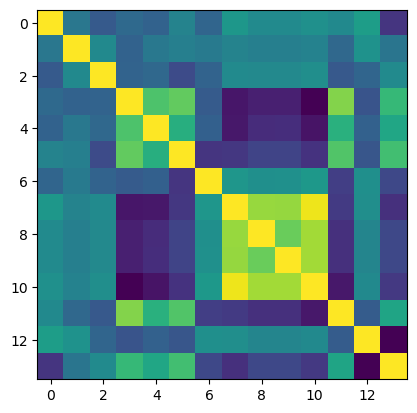

In [16]:
plt.imshow(df.corr())

In [20]:
df = df.drop(columns=['id'])

In [22]:
df = df.drop(columns=['label'])

In [23]:
df

,proto,service,state,rate,sttl,dload,swin,stcpb,dtcpb,dwin,ct_state_ttl,attack_cat
0,117,0,4,90909.090200,254,0.000000,0,0,0,0,2,6
1,117,0,4,125000.000300,254,0.000000,0,0,0,0,2,6
2,117,0,4,200000.005100,254,0.000000,0,0,0,0,2,6
3,117,0,4,166666.660800,254,0.000000,0,0,0,0,2,6
4,117,0,4,100000.002500,254,0.000000,0,0,0,0,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
82327,117,0,4,200000.005100,254,0.000000,0,0,0,0,2,6
82328,111,0,3,24.410067,254,2242.109863,255,1072535109,3284291478,255,1,6
82329,6,0,4,0.000000,0,0.000000,0,0,0,0,2,6
82330,6,0,4,0.000000,0,0.000000,0,0,0,0,2,6


In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
clf = RandomForestClassifier()

In [27]:
from sklearn.model_selection import train_test_split
import numpy as np

In [31]:
x = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [32]:
x

,proto,service,state,rate,sttl,dload,swin,stcpb,dtcpb,dwin,ct_state_ttl
0,117,0,4,90909.090200,254,0.000000,0,0,0,0,2
1,117,0,4,125000.000300,254,0.000000,0,0,0,0,2
2,117,0,4,200000.005100,254,0.000000,0,0,0,0,2
3,117,0,4,166666.660800,254,0.000000,0,0,0,0,2
4,117,0,4,100000.002500,254,0.000000,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
82327,117,0,4,200000.005100,254,0.000000,0,0,0,0,2
82328,111,0,3,24.410067,254,2242.109863,255,1072535109,3284291478,255,1
82329,6,0,4,0.000000,0,0.000000,0,0,0,0,2
82330,6,0,4,0.000000,0,0.000000,0,0,0,0,2


In [33]:
y

0        6
1        6
2        6
3        6
4        6
        ..
82327    6
82328    6
82329    6
82330    6
82331    6
Name: attack_cat, Length: 82332, dtype: int32

In [46]:
df_x_train,df_x_test,df_y_train,df_y_test = train_test_split(x,y,test_size=0.2)

In [47]:
clf.fit(df_x_train,df_y_train)

RandomForestClassifier()

In [48]:
df_y_pred = clf.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(df_y_pred,df_y_test)

0.29671464140402015

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import io
import os
import requests
from sklearn import metrics

In [52]:
cols_used = ['proto', 'service', 'state', 'rate', 'sttl', 'dload', 'swin', 'stcpb','dtcpb', 'dwin', 'ct_state_ttl', 'attack_cat']

In [53]:
cols_trained = ['proto', 'service', 'state', 'rate', 'sttl', 'dload', 'swin', 'stcpb','dtcpb', 'dwin', 'ct_state_ttl']

In [54]:
# Create dataframe versions for tabular GAN
df_x_test, df_y_test = df_x_test.reset_index(drop=True), df_y_test.reset_index(drop=True)
df_y_train = pd.DataFrame(df_y_train)
df_y_test = pd.DataFrame(df_y_test)

In [56]:
df_x_train

,proto,service,state,rate,sttl,dload,swin,stcpb,dtcpb,dwin,ct_state_ttl
20332,117,2,4,111111.107200,254,0.00000,0,0,0,0,2
21044,117,2,4,500000.001300,254,0.00000,0,0,0,0,2
68308,111,5,3,45.081120,62,20620.63477,255,1832483231,222504607,255,1
53114,111,5,3,71.255082,62,551799.37500,255,2911943521,409346941,255,1
4391,125,0,4,125000.000300,254,0.00000,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
38124,117,2,2,2849.002888,31,622981.93750,0,0,0,0,0
17846,117,2,4,250000.000600,254,0.00000,0,0,0,0,2
61014,117,2,4,142857.140900,254,0.00000,0,0,0,0,2
13120,117,2,4,111111.107200,254,0.00000,0,0,0,0,2


In [57]:
# Pandas to Numpy
x_train = df_x_train.values
x_test = df_x_test.values
y_train = df_y_train.values
y_test = df_y_test.values

In [58]:
# Build the neural network
model = Sequential()
# Hidden 1
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu')) 
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(12, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')

In [59]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=5, verbose=1, mode='auto',
        restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
        callbacks=[monitor], verbose=2,epochs=1000)

Epoch 1/1000
2059/2059 - 6s - loss: 4968224391168.0000 - val_loss: 4626149015552.0000
Epoch 2/1000
2059/2059 - 5s - loss: 652902465536.0000 - val_loss: 46858645504.0000
Epoch 3/1000
2059/2059 - 6s - loss: 359833632768.0000 - val_loss: 4979488768.0000
Epoch 4/1000
2059/2059 - 5s - loss: 166408830976.0000 - val_loss: 123455717376.0000
Epoch 5/1000
2059/2059 - 5s - loss: 80276111360.0000 - val_loss: 2153172736.0000
Epoch 6/1000
2059/2059 - 5s - loss: 73110052864.0000 - val_loss: 296269840384.0000
Epoch 7/1000
2059/2059 - 5s - loss: 23267192832.0000 - val_loss: 34398916608.0000
Epoch 8/1000
2059/2059 - 5s - loss: 3348124672.0000 - val_loss: 1680912256.0000
Epoch 9/1000
2059/2059 - 5s - loss: 196066344960.0000 - val_loss: 863013568.0000
Epoch 10/1000
2059/2059 - 5s - loss: 1814392832.0000 - val_loss: 207881648.0000
Epoch 11/1000
2059/2059 - 4s - loss: 3401836032.0000 - val_loss: 2607661312.0000
Epoch 12/1000
2059/2059 - 4s - loss: 895201984.0000 - val_loss: 1149403.2500
Epoch 13/1000
2059/2

In [60]:
pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 1.6144784122422096


In [62]:
pred

array([[5.539425 ],
       [5.1538963],
       [5.1220784],
       ...,
       [5.1220784],
       [5.1220784],
       [5.1220784]], dtype=float32)

In [63]:
y_test

array([[6],
       [5],
       [6],
       ...,
       [6],
       [6],
       [2]])

In [82]:
from tabgan.sampler import GANGenerator
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [80]:
!pip install tabgan

     ---------------------------------------- 81.8/81.8 kB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 7.6 MB/s eta 0:00:00


In [83]:
gen_x, gen_y = GANGenerator(gen_x_times=1.1, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999, \
              is_post_process=True,
           adversarial_model_params={
               "metrics": "rmse", "max_depth": 2, "max_bin": 100, 
               "learning_rate": 0.02, "random_state": \
                42, "n_estimators": 500,
           }, pregeneration_frac=2, only_generated_data=False,\
           gan_params = {"batch_size": 500, "patience": 25, \
          "epochs" : 500,}).generate_data_pipe(df_x_train, df_y_train,\
          df_x_test, deep_copy=True, only_adversarial=False, \
          use_adversarial=True)

Fitting CTGAN transformers for each column:   0%|          | 0/12 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 13174, number of negative: 13173
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 26347, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500019 -> initscore=0.000076
[LightGBM] [Info] Start training from score 0.000076
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [84]:
gen_x

,proto,service,state,rate,sttl,dload,swin,stcpb,dtcpb,dwin,ct_state_ttl
0,110,8,4,215009.571898,11,1.104616e+07,252,3204299939,3705238208,2,6
1,68,8,2,323927.678146,24,4.476533e+06,252,3633656726,3289554238,0,6
2,110,5,4,330351.611718,1,8.917202e+06,251,3755301427,4240007461,2,5
3,95,8,5,234017.136932,28,2.943311e+06,254,4229229237,924915639,252,1
4,116,8,4,148160.411911,23,1.494071e+07,253,3108011074,2310496107,2,5
...,...,...,...,...,...,...,...,...,...,...,...
76168,127,0,4,90909.090200,254,0.000000e+00,0,0,0,0,2
76169,127,0,4,90909.090200,254,0.000000e+00,0,0,0,0,2
76170,111,5,3,11.275871,254,1.644951e+03,255,334213941,4270827573,255,1
76171,111,5,3,16.299480,254,2.377806e+03,255,2075036256,4284594084,255,1


In [85]:
# Predict
pred = model.predict(gen_x.values)
score = np.sqrt(metrics.mean_squared_error(pred,gen_y.values))
#more the rmse towards 0 better the model
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 113.96463756952335
